Results for h = 0.05
       x  y (h=0.05)  Error (h=0.05)
0   0.00    1.000000        0.000000
1   0.05    1.053971        0.051467
2   0.10    1.116888        0.106812
3   0.15    1.190571        0.167685
4   0.20    1.277393        0.236158
5   0.25    1.380496        0.314928
6   0.30    1.504126        0.407629
7   0.35    1.654161        0.519314
8   0.40    1.838969        0.657261
9   0.45    2.070876        0.832354
10  0.50    2.368804        1.061604

Results for h = 0.025
        x  y (h=0.025)  Error (h=0.025)
0   0.000     1.000000         0.000000
1   0.025     1.025964         0.025339
2   0.050     1.053971         0.051467
3   0.075     1.084208         0.078560
4   0.100     1.116888         0.106812
5   0.125     1.152250         0.136440
6   0.150     1.190571         0.167685
7   0.175     1.232165         0.200821
8   0.200     1.277393         0.236158
9   0.225     1.326675         0.274055
10  0.250     1.380497         0.314928
11  0.275     1.439425         0

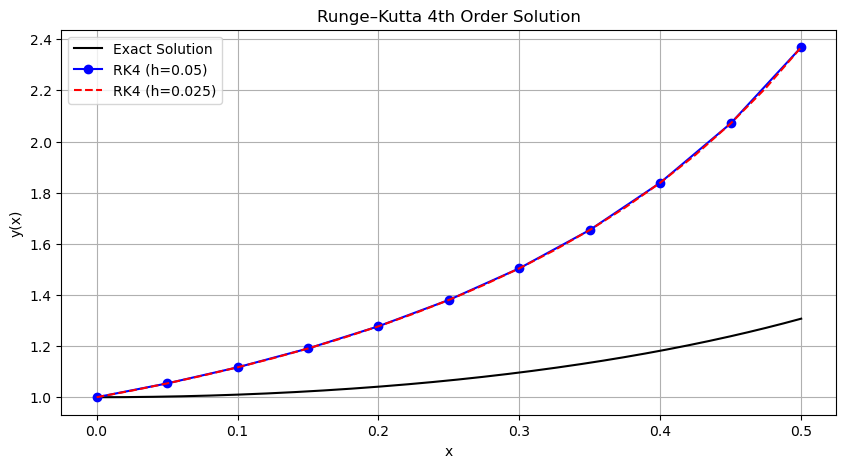

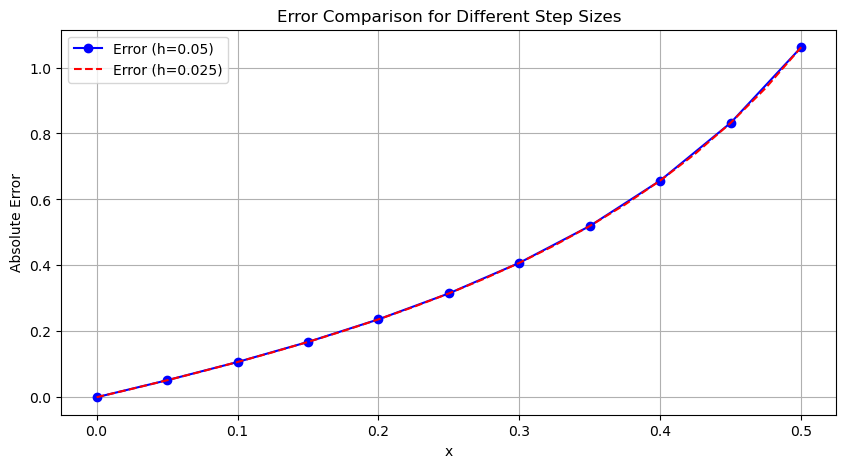

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def f(x, y):
    return x * y + y**2

def y_exact(x):
    return np.exp(x**2 / 2) / (2 - np.exp(x**2 / 2))

def runge_kutta_4(f, x0, y0, h, x_end):
    n = int((x_end - x0) / h)
    x_vals = [x0]
    y_vals = [y0]
    errors = [abs(y0 - y_exact(x0))]

    for i in range(n):
        x, y = x_vals[-1], y_vals[-1]
        k1 = f(x, y)
        k2 = f(x + h/2, y + h*k1/2)
        k3 = f(x + h/2, y + h*k2/2)
        k4 = f(x + h, y + h*k3)
        y_next = y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        x_next = x + h

        x_vals.append(x_next)
        y_vals.append(y_next)
        errors.append(abs(y_exact(x_next) - y_next))

    return np.array(x_vals), np.array(y_vals), np.array(errors)

x0, y0, x_end = 0, 1, 0.5
h1, h2 = 0.05, 0.025
x1, y1, e1 = runge_kutta_4(f, x0, y0, h1, x_end)
x2, y2, e2 = runge_kutta_4(f, x0, y0, h2, x_end)

df_h1 = pd.DataFrame({"x": x1, "y (h=0.05)": y1, "Error (h=0.05)": e1})
df_h2 = pd.DataFrame({"x": x2, "y (h=0.025)": y2, "Error (h=0.025)": e2})

print("Results for h = 0.05")
print(df_h1)
print("\nResults for h = 0.025")
print(df_h2)

x_exact = np.linspace(0, 0.5, 200)
y_exact_vals = y_exact(x_exact)

plt.figure(figsize=(10, 5))
plt.plot(x_exact, y_exact_vals, 'k-', label="Exact Solution")
plt.plot(x1, y1, 'bo-', label="RK4 (h=0.05)")
plt.plot(x2, y2, 'r--', label="RK4 (h=0.025)")
plt.title("Runge–Kutta 4th Order Solution")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(x1, e1, 'bo-', label="Error (h=0.05)")
plt.plot(x2, e2, 'r--', label="Error (h=0.025)")
plt.title("Error Comparison for Different Step Sizes")
plt.xlabel("x")
plt.ylabel("Absolute Error")
plt.legend()
plt.grid(True)
plt.show()

In [2]:
# 7
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

def f(x, y):
    return x * y + y**2

def rk4(f, x0, y0, h, x_end):
    xs = [x0]
    ys = [y0]
    x = x0
    y = y0
    while x < x_end:
        k1 = f(x, y)
        k2 = f(x + h/2, y + h/2 * k1)
        k3 = f(x + h/2, y + h/2 * k2)
        k4 = f(x + h, y + h * k3)
        y += h/6 * (k1 + 2*k2 + 2*k3 + k4)
        x = round(x + h, 10)
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

x_ref, y_ref = rk4(f, 0, 1, 0.001, 0.5)
ref_interp = interp1d(x_ref, y_ref, kind='cubic', fill_value="extrapolate")
y_true = float(ref_interp(0.5))

step_sizes = [0.1, 0.05, 0.025, 0.0125]
results = []

for h in step_sizes:
    x, y = rk4(f, 0, 1, h, 0.5)
    y_approx = y[-1]
    error = abs(y_approx - y_true)
    results.append((h, y_approx, error))

orders = [None]
for i in range(1, len(results)):
    E1 = results[i-1][2]
    E2 = results[i][2]
    p = np.log2(E1 / E2)
    orders.append(round(p, 4))

# Create DataFrame
df = pd.DataFrame(results, columns=["Step Size h", "y(0.5) Approx", "Error"])
df["Order of Convergence"] = orders

# Display table
print("\n  RK4 Convergence Order Table\n")
print(df.to_markdown(index=False))


  RK4 Convergence Order Table

|   Step Size h |   y(0.5) Approx |       Error |   Order of Convergence |
|--------------:|----------------:|------------:|-----------------------:|
|        0.1    |         2.36869 | 0.000117845 |               nan      |
|        0.05   |         2.3688  | 7.52436e-06 |                 3.9692 |
|        0.025  |         2.36881 | 4.6491e-07  |                 4.0165 |
|        0.0125 |         2.36881 | 2.8672e-08  |                 4.0192 |
